# Import the cleaned data (see Preprocessing.py for more info)

In [1]:
from Preprocessing import getData
import numpy as np

x_train,x_val,x_test,y_train,y_val,y_test = getData()

print(x_train[0])

13990 new datasets created
2231 new datasets created
4210 new datasets created
[[-1.68042768e+00 -1.56010796e+00  8.59134976e-01 -1.02436036e+00
   0.00000000e+00  0.00000000e+00 -1.05426000e+00  2.10557232e-01
  -6.36238929e-01 -3.55271368e-15  1.45262918e-01  4.17594861e-01
  -7.65503633e-01 -9.84341635e-01 -2.22044605e-16 -1.83072601e-01
   1.16133708e+00 -3.29715783e-01 -6.86822145e-01 -2.71492413e-01
  -1.04083409e-17 -7.79025964e-01  0.00000000e+00  0.00000000e+00
   1.00993203e+00  1.22886104e+00]]


In [2]:
print(f"train data: {len(x_train)}\t val data : {len(x_val)}\t test data: {len(x_test)}")
unique, counts = np.unique(y_train, return_counts=True)
print(f"Classes and count for x_train: {dict(zip(unique, counts))}")
print(x_train.shape)
most_probable_class = np.argmax(counts)

train data: 13990	 val data : 2231	 test data: 4210
Classes and count for x_train: {0: 3570, 1: 6928, 2: 3492}
(13990, 1, 26)


# Generate the model

In [3]:
from keras import layers
from keras.models import Sequential

In [4]:
print(x_train.shape)

model = Sequential()
# model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))

# model.add(layers.LSTM(units=20, return_sequences=True))
# model.add(layers.LSTM(units=26, return_sequences=True))

model.add(layers.LSTM(units=20,activation='relu',return_sequences=True))
# model.add(layers.Dropout(0.2))
model.add(layers.LSTM(units=3,activation='softmax'))


model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])



(13990, 1, 26)


In [5]:
rollingWindow = 1000
valWindow = 0
step = 500
from tqdm import tqdm
for i in tqdm(range(0,len(x_train) - rollingWindow-valWindow,step)):
    model.fit(x_train[i:i+rollingWindow], y_train[i:i+rollingWindow], epochs=1, verbose=0,validation_data=(x_train[i+rollingWindow:i+rollingWindow+valWindow], y_train[i+rollingWindow:i+rollingWindow+valWindow]))

evaluatation = model.evaluate(x_test, y_test,verbose=0)


print(f"\n\nEvaluation loss:  {evaluatation[0]} \t Evaluation accuracy: {evaluatation[1]}")

from sklearn.metrics import accuracy_score
base_line = accuracy_score(y_test, [most_probable_class]*len(y_test))
print(base_line)

100%|██████████| 26/26 [00:13<00:00,  1.92it/s]




Evaluation loss:  0.561960756778717 	 Evaluation accuracy: 0.7548693418502808
0.4750593824228028


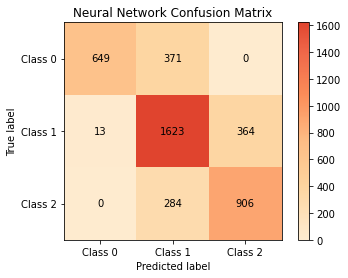

In [6]:
from sklearn_evaluation import plot
import matplotlib.pyplot as plt

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

y_true = y_test

t = plot.confusion_matrix(y_true, y_pred)
t.set_title("Neural Network Confusion Matrix")
plt.show()